<a href="https://colab.research.google.com/github/juman050/Sentiment-Analysis/blob/main/Final_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mounting Google Drive

In [ ]:
#Mount the Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Install Libraries package

In [ ]:
#Install Libraries that not in the COLAB Google
!pip install symspellpy
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 kB 1.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 15.2 MB/s eta 0:00:00
  Created wheel for editdistpy: filename=editdistpy-0.1.4-cp310-cp310-linux_x86_64.whl size=187477 sha256=f37bb16aa7825d223810fca7349ed8db3c35881183e270065f9afe47c74fcba0
  Stored in directory: /root/.cache/pip/wheels/4c/0f/10/c20d67cd765ee5b3666d759a307241bba0663135d6ee1c0072
Successfully built editdistpy
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 7.0 MB/s eta 0:00:00


# Import libraries that will be used for following steps

In [ ]:
#Import libraries that will be used for following steps
import nltk, warnings, string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression, SGDClassifier, RidgeClassifier, PassiveAggressiveClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier, BaggingClassifier, VotingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from symspellpy import Verbosity, SymSpell
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split

In [ ]:
#Install omw
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

## Loading the dataset

In [ ]:
#Loading the dataset
df = pd.read_csv('/content/drive/MyDrive/senti/Dataset_files/preprocessed_latest.csv', encoding='latin-1')
# This code will display the first 5 rows of the pandas DataFrame 'df'
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.sample(5)


,target,ids,date,flag,user,text
1052313,1,1961379577,Fri May 29 09:24:47 PDT 2009,NO_QUERY,SamG2020,jb thank god desk next arcticlike server room
33165,0,1564434324,Mon Apr 20 03:28:31 PDT 2009,NO_QUERY,Ed_Balmonte,might f available contact someone
238627,0,1980452494,Sun May 31 06:47:10 PDT 2009,NO_QUERY,LiatTsarfati,hurt foot gym today
894825,1,1692450436,Sun May 03 20:01:22 PDT 2009,NO_QUERY,anitc,yeah albert n car finally back pasadena
1147808,1,1978120298,Sat May 30 22:29:44 PDT 2009,NO_QUERY,JossieGee,mileycyrus ill vote ya miley


In [ ]:
# This code will print the dimensions of the pandas DataFrame 'df'
df.shape


(1600000, 6)

In [ ]:
# This code will print information about the pandas DataFrame 'df', including column names, data types, and non-null counts
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1599479 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


## Text Preprocessing

In [ ]:
# This code will calculate the number of missing values (NaN) in each column of the pandas DataFrame 'df'
df.isnull().sum()


,0
target,0
ids,0
date,0
flag,0
user,0
text,521


In [ ]:
# This code will remove all rows from the pandas DataFrame 'df' that contain any missing values (NaN), and modify 'df' in place
df.dropna(inplace=True)


In [ ]:
# This code will calculate the number of missing values (NaN) in each column of the pandas DataFrame 'df'
df.isna().sum()


,0
target,0
ids,0
date,0
flag,0
user,0
text,0


In [ ]:
# This code defines a function called 'text_preprocess' that takes a string of text as input and performs some basic text preprocessing tasks, including removing punctuation and stop words, and converting all words to lowercase
import nltk
def text_preprocess(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english') and not word.isdigit()])

In [ ]:
# This code downloads the list of stopwords for the English language from the nltk library
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# This code applies the 'text_preprocess' function to the 'clean_text' column of the pandas DataFrame 'df'
df.text = df.text.apply(text_preprocess)

In [ ]:
# This code defines a function called 'stem_words' that takes a string of text as input and applies stemming to each word using the SnowballStemmer algorithm from the nltk library
stemmer = SnowballStemmer('english')

def stem_words(text):
    return ' '.join([stemmer.stem(word) for word in text.split()])

In [ ]:
# This code defines a function called 'lemmatize_words' that takes a string of text as input and applies lemmatization to each word using the WordNetLemmatizer algorithm from the nltk library
lemmatizer = WordNetLemmatizer()

def lemmatize_words(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])

In [ ]:
# This code defines a function called 'spelling_correction' that takes a string of text as input and applies spelling correction using the SymSpell algorithm
symspell = SymSpell()

def spelling_correction(text):
    correct_spellings = []
    for token in text.split():
        x = symspell.lookup(token,Verbosity.CLOSEST,max_edit_distance=2,include_unknown=True)[0].__str__()
        y = x.split(',')[0]
        correct_spellings.append(y)
    return ' '.join(correct_spellings)

In [ ]:
# This code applies a series of text preprocessing steps to the 'text' column of the pandas DataFrame 'df', including stemming, lemmatization, and spelling correction
import nltk
nltk.download('wordnet')
df.text = df.text.apply(stem_words)
df.text = df.text.apply(lemmatize_words)
df.text = df.text.apply(spelling_correction)

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# This code selects rows in the pandas DataFrame 'df' where the 'text' column contains only whitespace characters
df.loc[df.text.str.isspace()]

,target,ids,date,flag,user,text


In [ ]:
# This code replaces the values -1.0, 0.0, and 1.0 in the 'category' column of the pandas DataFrame 'df' with the corresponding string values 'Negative', and 'Positive', respectively
df.target.replace([0.0,1.0],['Negative','Positive'],inplace=True)

In [ ]:
df.to_csv('/content/drive/MyDrive/senti/Dataset_files/preprocessed_final.csv', index=False)
df.sample(5)

,target,ids,date,flag,user,text
1245722,Positive,1995147575,Mon Jun 01 13:01:34 PDT 2009,NO_QUERY,missnuski,tatacrush thank think hair
1210517,Positive,1989054544,Mon Jun 01 00:11:50 PDT 2009,NO_QUERY,xsodapopp,thankthelord final go imag want background ill...
1100301,Positive,1970648595,Sat May 30 04:42:07 PDT 2009,NO_QUERY,danyellbeee,xokristiinn hahah okay oh god gonna regret exc...
1296361,Positive,2004048757,Tue Jun 02 07:34:59 PDT 2009,NO_QUERY,GeePawHill,alancfr dianaofportland circl grass aw transit...
194326,Negative,1970266179,Sat May 30 03:08:36 PDT 2009,NO_QUERY,standinginalley,bore deathwond dothink stop procrastin start w...


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('/content/drive/MyDrive/senti/Dataset_files/preprocessed_final.csv')


In [ ]:
positive_count = (df['target'] == 'Positive').sum()
negative_count = (df['target'] == 'Negative').sum()


## Exploratory Data Analysis

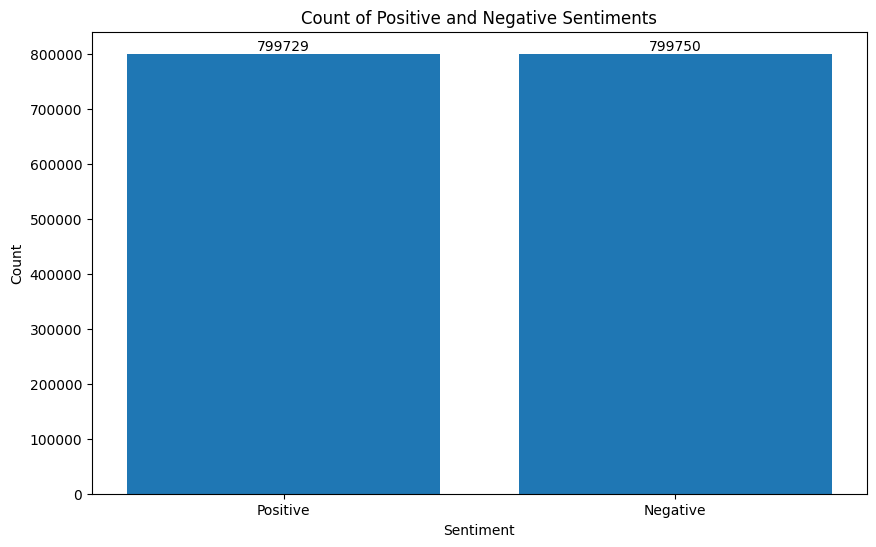

In [ ]:
# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(['Positive', 'Negative'], [positive_count, negative_count])

# Customize the graph
plt.title('Count of Positive and Negative Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# Add value labels on top of each bar
for i, v in enumerate([positive_count, negative_count]):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Display the graph
plt.show()


In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('/content/drive/MyDrive/senti/Dataset_files/preprocessed_final.csv')

# Separate positive and negative tweets
positive_tweets = df[df['target'] == 'Positive']['text']
negative_tweets = df[df['target'] == 'Negative']['text']

In [ ]:
def generate_wordcloud(text, title):
    # Join all tweets into a single string, converting each element to a string
    text = ' '.join(str(tweet) for tweet in text if pd.notna(tweet))

    # Create and generate a word cloud image
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the generated image
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

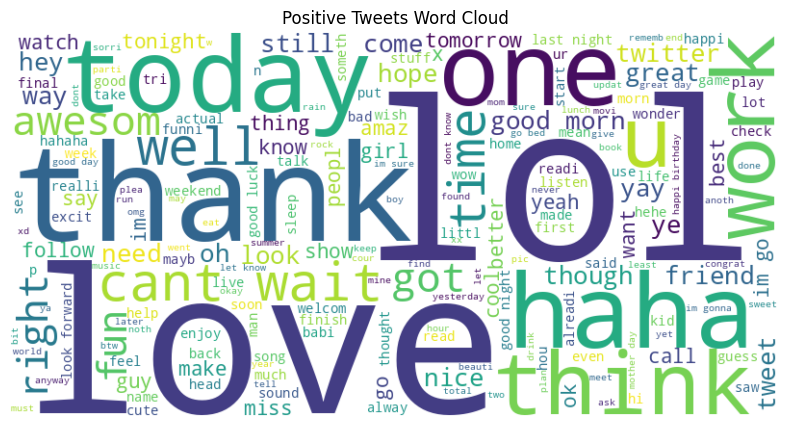

In [ ]:
# Generate word cloud for positive tweets
generate_wordcloud(positive_tweets, 'Positive Tweets Word Cloud')


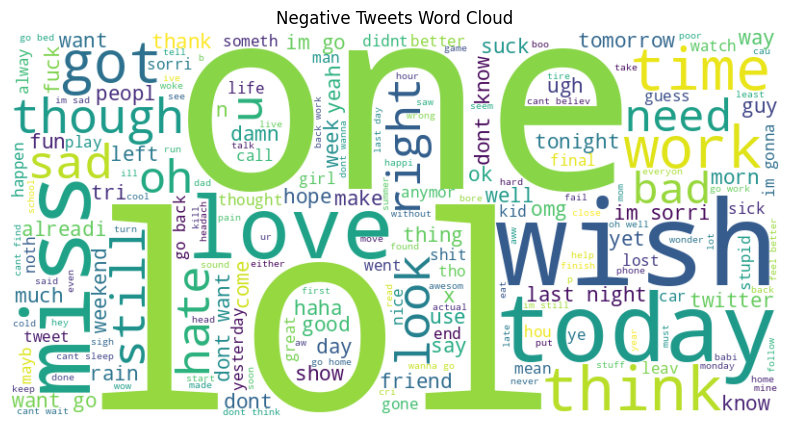

In [ ]:
# Generate word cloud for negative tweets
generate_wordcloud(negative_tweets, 'Negative Tweets Word Cloud')


## Dividing the dataset into training and test sets

In [ ]:
X = df.text
y = df.target
# Check for NaN values
print(f"Number of NaN values in 'text' column: {X.isna().sum()}")

# Remove rows with NaN values
df_clean = df.dropna(subset=['text'])
X = df_clean.text
y = df_clean.target

print(f"Shape of data after removing NaN values: {df_clean.shape}")

Number of NaN values in 'text' column: 22
Shape of data after removing NaN values: (1599457, 6)


In [ ]:
# This code splits the data into training and test sets using the 'train_test_split' function from the 'sklearn.model_selection' library
from sklearn.model_selection import train_test_split

# Split data into training and test sets with a ratio of 70:30 and a random state of 42 for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Text Vectorization and Feature Extractions

In [ ]:

from sklearn.feature_extraction.text import TfidfVectorizer

# Create an instance of the 'TfidfVectorizer' class and fit it to the training data
tfidf = TfidfVectorizer()
X_train_vect = tfidf.fit_transform(X_train)

# Transform the test data using the fitted vectorizer
X_test_vect = tfidf.transform(X_test)

In [ ]:
# This code retrieves the learned vocabulary from the 'TfidfVectorizer' object stored in the 'tfidf' variable
tfidf.vocabulary_

{'crawl': 93109,
 'sure': 428370,
 'life': 255591,
 'go': 165291,
 'chang': 73985,
 'forev': 150787,
 'mattwagst': 279026,
 'know': 241467,
 'someth': 411425,
 'longer': 262588,
 'think': 445875,
 'your': 503751,
 'borderlin': 54019,
 'evil': 137639,
 'fulli': 155613,
 'fledg': 147961,
 'shepi': 397914,
 'taught': 434742,
 'well': 484399,
 'beethequeenbe': 41616,
 'lol': 261590,
 'gonna': 166517,
 'lil': 256486,
 'warmer': 480808,
 'still': 421522,
 'sighhh': 402210,
 'matter': 278417,
 'time': 449427,
 'infect': 200140,
 'site': 404585,
 'wellyjulz': 484768,
 'im': 198008,
 'wooooorrrrrrk': 492191,
 'cinema': 81786,
 'full': 155571,
 'timer': 449677,
 'need': 313188,
 'money': 297999,
 'nicksantino': 316932,
 'met': 285970,
 'final': 145958,
 'haha': 174267,
 'foot': 150502,
 'hurt': 192672,
 'bad': 34962,
 'like': 256246,
 'fire': 146641,
 'damn': 99219,
 'flat': 147780,
 'plan': 348730,
 'today': 452312,
 'much': 305227,
 'evryon': 137870,
 'el': 128338,
 'theexpert': 441514,
 'twee

In [ ]:
# This code retrieves the length of the learned vocabulary from the 'TfidfVectorizer' object stored in the 'tfidf' variable
len(tfidf.vocabulary_)

508139

## Model Training & Evaluation

In [ ]:
# This code creates an empty dictionary called 'accuracy_scores' to store the accuracy scores of various machine learning models trained on the sentiment analysis dataset
accuracy_scores = {}

#SVM ✅

[[182462  56746]
 [ 52554 188076]]
              precision    recall  f1-score   support

    Negative       0.78      0.76      0.77    239208
    Positive       0.77      0.78      0.77    240630

    accuracy                           0.77    479838
   macro avg       0.77      0.77      0.77    479838
weighted avg       0.77      0.77      0.77    479838



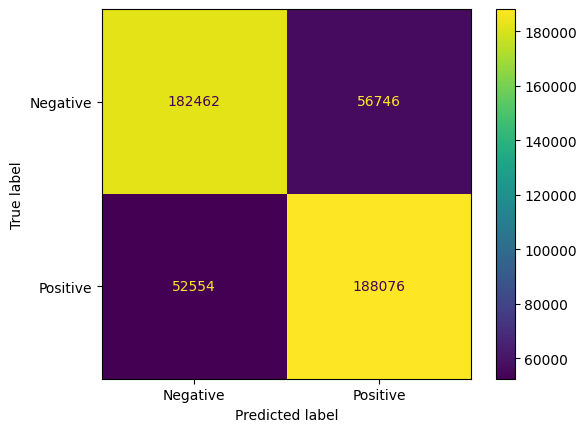

In [ ]:
# Initialize SVM
svm_model = LinearSVC(random_state=42)
svm_model.fit(X_train_vect,y_train)
y_pred_svm = svm_model.predict(X_test_vect)
accuracy_svm = accuracy_score(y_test,y_pred_svm)
print(confusion_matrix(y_test,y_pred_svm))
disp_svm = ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_svm), display_labels = svm_model.classes_)
disp_svm.plot()
print(classification_report(y_test,y_pred_svm))
accuracy_scores['SVM'] = accuracy_score(y_test,y_pred_svm)

#LogisticRegression ✅

[[181541  57667]
 [ 48380 192250]]
              precision    recall  f1-score   support

    Negative       0.79      0.76      0.77    239208
    Positive       0.77      0.80      0.78    240630

    accuracy                           0.78    479838
   macro avg       0.78      0.78      0.78    479838
weighted avg       0.78      0.78      0.78    479838



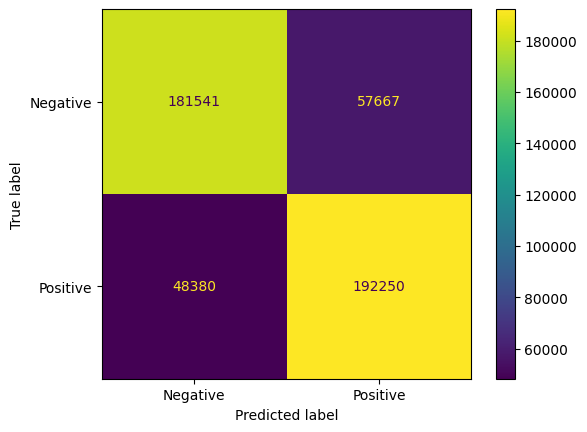

In [ ]:
#LR
lr = LogisticRegression()
lr.fit(X_train_vect,y_train)
lr_pred = lr.predict(X_test_vect)
print(confusion_matrix(y_test,lr_pred))
disp_lr = ConfusionMatrixDisplay(confusion_matrix(y_test,lr_pred), display_labels = lr.classes_)
disp_lr.plot()
print(classification_report(y_test,lr_pred))
accuracy_scores['LR'] = accuracy_score(y_test,lr_pred)

#MultinomialNB ✅

In [ ]:
# This code trains a Multinomial Naive Bayes (MNB) classifier on the transformed training data and corresponding sentiment categories
from sklearn.naive_bayes import MultinomialNB

# Create an instance of the MNB classifier
mnb = MultinomialNB()
# Train the MNB classifier on the transformed training data and corresponding sentiment categories
mnb.fit(X_train_vect,y_train)
# This code generates predictions on the transformed test data using the trained MNB classifier and calculates various evaluation metrics for the predictions
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Generate predictions on the transformed test data using the trained MNB classifier
mnb_pred = mnb.predict(X_test_vect)

# Generate a confusion matrix and classification report to evaluate the performance of the MNB classifier
print(confusion_matrix(y_test,mnb_pred))
print(classification_report(y_test,mnb_pred))
# Calculate the accuracy score of the MNB classifier and store it in the 'accuracy_scores' dictionary
accuracy_scores['MNB'] = accuracy_score(y_test,mnb_pred)

[[189907  49301]
 [ 67288 173342]]
              precision    recall  f1-score   support

    Negative       0.74      0.79      0.77    239208
    Positive       0.78      0.72      0.75    240630

    accuracy                           0.76    479838
   macro avg       0.76      0.76      0.76    479838
weighted avg       0.76      0.76      0.76    479838



#Experiment with new dataset✅

In [ ]:
#load new dataset for testing
new_dataset = pd.read_csv('/content/drive/MyDrive/senti/Dataset_files/experiment_dataset.csv', encoding='latin-1')
DATASET_COLUMNS = ["target", "text"]
DATASET_ENCODING = "ISO-8859-1"
#define new columns for the dataset
new_dataset = pd.read_csv('/content/drive/MyDrive/senti/Dataset_files/experiment_dataset.csv', encoding=DATASET_ENCODING, names=DATASET_COLUMNS)
new_dataset.dropna(inplace=True)
#test_loc = new_dataset.iloc[[0],[1]]
#test_loc_col = new_dataset.iloc[[0],[0]]
#x2 = tfidf.transform(test_loc)
x2 = tfidf.transform(new_dataset['text'])
new_dataset.head()

,target,text
0,Negative,worried about health
1,Positive,good job
2,Negative,what is wrong
3,Positive,well done


In [ ]:
# Initialize SVM for new dataset
svm_model = LinearSVC(random_state=42)
svm_model.fit(X_train_vect, y_train)
#predic on new dataset
svm2 = svm_model.predict(x2)
print(confusion_matrix(new_dataset['target'],svm2))
print(classification_report(new_dataset['target'], svm2))

[[1 1]
 [0 2]]
              precision    recall  f1-score   support

    Negative       1.00      0.50      0.67         2
    Positive       0.67      1.00      0.80         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



In [ ]:
#LR for new dataset
lr2 = LogisticRegression()
lr2.fit(X_train_vect,y_train)
lr_pred2 = lr2.predict(x2)
print(confusion_matrix(new_dataset['target'],lr_pred2))
print(classification_report(new_dataset['target'], lr_pred2))

[[1 1]
 [0 2]]
              precision    recall  f1-score   support

    Negative       1.00      0.50      0.67         2
    Positive       0.67      1.00      0.80         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4

